(sec:numpy_3)=
# 어레이 중심 프로그래밍

주어진 어레이로붙 새로운 어레이를 생성하기 위해 
어레이를 조작하는 함수에 집중하는 프로그래밍이
**어레이 중심 프로그래밍**<font size='2'>array-oriented programming</font>이다.
어레이 중심 프로그래밍에 가중 중요한 넘파이 함수와 어레이 메서드를 소개한다.

**주요 내용**

- 유니버설 함수
- 기초 통계 함수
- 부울 어레이 활용
- 어레이 정렬
- 기초 선형대수 함수
- 난수 생성 함수

**기본 설정**

`numpy` 모듈과 시각화 도구 모듈인 `matplotlib.pyplot`에 대한 기본 설정을 지정한다.

In [1]:
# 넘파이
import numpy as np

# 램덤 시드
np.random.seed(12345)

# 어레이 사용되는 부동소수점들의 정확도 지정
np.set_printoptions(precision=4, suppress=True)

In [2]:
# 파이플롯
import matplotlib.pyplot as plt

# # 도표 크기 지정
# plt.rc('figure', figsize=(10, 6))

## 유니버설 함수

**유니버설 함수**<font size='2'>universal function</font>는 어레이의 항목 각각에 대해 적용되는 함수이며, **ufunc**로도 불린다.
60개 이상의 유니버설 함수가 존재하며,
그중 상당수가 수학 관련 함수다. 
보다 자세한 내용은 [유니버설 함수 공식문서](https://numpy.org/doc/stable/reference/ufuncs.html#available-ufuncs)에서
확인할 수 있다.

여기서는 예제를 통해 유니버설 함수의 활용법을 살펴본다.

먼저 (2, 5) 모양의 어레이를 하나 생성하자.

In [3]:
arr = np.arange(10).reshape((2,5))
arr

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

**`np.sqrt()` 함수**

주어진 어레이 각 항목의 제곱근으로 이루어진 어레이가 반환된다.

In [4]:
np.sqrt(arr)

array([[0.    , 1.    , 1.4142, 1.7321, 2.    ],
       [2.2361, 2.4495, 2.6458, 2.8284, 3.    ]])

**`np.exp()` 함수**

주어진 어레이 각 항목을 지수로 사용하는 지수승의 값으로 이루어진 어레이가 반환된다.
단, 밑은 오일러 상수 `e`가 사용된다.

In [5]:
np.exp(arr)

array([[   1.    ,    2.7183,    7.3891,   20.0855,   54.5982],
       [ 148.4132,  403.4288, 1096.6332, 2980.958 , 8103.0839]])

**`np.maximum()` 함수**

여러 개의 어레이를 인자로 받는 함수에 대해서도 동일한 방식으로 작동한다.
예를 들어, `maximum()` 함수는 항목별 최대값으로 이루어진 어레이를 반환한다.

In [6]:
x = np.random.randn(8).reshape((4, 2))
y = np.random.randn(8).reshape((4, 2))

In [7]:
x

array([[-0.2047,  0.4789],
       [-0.5194, -0.5557],
       [ 1.9658,  1.3934],
       [ 0.0929,  0.2817]])

In [8]:
y

array([[ 0.769 ,  1.2464],
       [ 1.0072, -1.2962],
       [ 0.275 ,  0.2289],
       [ 1.3529,  0.8864]])

In [9]:
np.maximum(x, y)

array([[ 0.769 ,  1.2464],
       [ 1.0072, -0.5557],
       [ 1.9658,  1.3934],
       [ 1.3529,  0.8864]])

**`np.divmod()` 함수**

여러 개의 어레이를 반환하는 유니버설 함수도 있다.
예를 들어, `divmod()` 함수는 어레이 나눗셈 실행 결과를 항목별 나눗셈의 몫으로 이루어진 어레이와
나머지로 이루어진 어레이의 튜플을 반환한다.

먼저 (2,4) 모양의 어레이를 하나 만들자.

In [10]:
arr = np.arange(10,32, 3).reshape((2,4))
arr

array([[10, 13, 16, 19],
       [22, 25, 28, 31]])

위 어레이를 3으로 나누면 모든 항목 각각에 대한 몫과 나머지를 각각 따로 모아 두 개의 어레이로 이루어진 튜플을 
반환한다.

In [11]:
np.divmod(arr, 3)

(array([[ 3,  4,  5,  6],
        [ 7,  8,  9, 10]], dtype=int32),
 array([[1, 1, 1, 1],
        [1, 1, 1, 1]], dtype=int32))

두 어레이의 나눗셈도 가능하다.

In [12]:
arr2 = np.arange(2, 10).reshape((2,4))
arr2

array([[2, 3, 4, 5],
       [6, 7, 8, 9]])

In [13]:
np.divmod(arr, arr2)

(array([[5, 4, 4, 3],
        [3, 3, 3, 3]]),
 array([[0, 1, 0, 4],
        [4, 4, 4, 4]]))

부동소수점의 나눗셈에 대해서도 몫과 나머지를 구한다.

In [14]:
arr3 = np.arange(10,30, 2.5).reshape((2,4))
arr3

array([[10. , 12.5, 15. , 17.5],
       [20. , 22.5, 25. , 27.5]])

In [15]:
arr4 = np.arange(2, 4.3, 0.3).reshape((2,4))
arr4

array([[2. , 2.3, 2.6, 2.9],
       [3.2, 3.5, 3.8, 4.1]])

In [16]:
np.divmod(arr3, arr4)

(array([[5., 5., 5., 6.],
        [6., 6., 6., 6.]]),
 array([[0. , 1. , 2. , 0.1],
        [0.8, 1.5, 2.2, 2.9]]))

## 기초 통계 함수

넘파이 어레이에 사용된 항목들의 합(sum), 평균값(mean), 표준편차(std) 등 기본 통계를 계산하는 함수를
어레이가 지원한다.

연습을 위해 먼저 (2, 3) 모양의 어레이를 무작위로 생성한다.

In [17]:
arr = np.arange(1, 7).reshape(2, 3)
arr

array([[1, 2, 3],
       [4, 5, 6]])

**`mean()` 메서드**

어레이에 포함된 모든 값들의 평균값을 계산한다.

In [18]:
arr.mean()

3.5

**`sum()` 메서드**

어레이에 포함된 모든 값들의 합을 계산한다.

In [19]:
arr.sum()

21

**`cumsum()` 메서드**

어레이에 포함된 모든 값들의 누적합을 계산한다.

In [20]:
arr.cumsum()

array([ 1,  3,  6, 10, 15, 21])

**`cumprod()` 메서드**

어레이에 포함된 모든 값들의 누적곱을 계산한다.

In [21]:
arr.cumprod()

array([  1,   2,   6,  24, 120, 720])

**축<font size='2'>axis</font> 활용**

앞서 언급된 모든 함수는 축(axis)을 이용한 함수 적용도 지원한다.
즉, 축을 지정하여 축에 따른 결과를 모든 어레이를 생성한다.
축 지정은 `axis` 키워드 인자를 사용한다.

* `axis=0`: 행을 기준으로 함수 적용
* `axis=1`: 열을 기준으로 함수 적용

**평균값**

* 열별 평균값 계산: 행을 따라 평균값을 계산해야 하기에 `axis=0` 지정.

In [22]:
arr.mean(axis=0)

array([2.5, 3.5, 4.5])

* 행별 평균값 계산: 열을 따라 평균값을 계산해야 하기에 `axis=1` 지정.

In [23]:
arr.mean(axis=1)

array([2., 5.])

**합**

* 열별 항목의 합 계산: 행을 따라 항목들의 합을 계산해야 하기에 `axis=0` 지정.

In [24]:
arr.sum(axis=0)

array([5, 7, 9])

* 행별 항목의 합 계산: 열을 따라 항목들의 합을 계산해야 하기에 `axis=1` 지정.

In [25]:
arr.sum(axis=1)

array([ 6, 15])

<div align="center"><img src="https://raw.githubusercontent.com/codingalzi/datapy/master/jupyter-book/images/ufunc-sum.png" style="width:330px;"></div>

<p><div style="text-align: center">&lt;그림 출처: <a href="https://betterprogramming.pub/numpy-illustrated-the-visual-guide-to-numpy-3b1d4976de1d">NumPy Illustrated: The Visual Guide to NumPy</a>&gt;</div></p>

**누적합**

* 열별 항목의 누적합 계산: 행을 따라 항목들의 누적합을 계산해야 하기에 `axis=0` 지정.

In [26]:
arr.cumsum(axis=0)

array([[1, 2, 3],
       [5, 7, 9]])

* 행별 항목의 누적합 계산: 열을 따라 항목들의 누적합을 계산해야 하기에 `axis=1` 지정.

In [27]:
arr.cumsum(axis=1)

array([[ 1,  3,  6],
       [ 4,  9, 15]])

**누적곱**

* 열별 항목의 누적곱 계산: 행을 따라 항목들의 누적곱을 계산해야 하기에 `axis=0` 지정.

In [28]:
arr.cumprod(axis=0)

array([[ 1,  2,  3],
       [ 4, 10, 18]])

* 행별 항목의 누적곱 계산: 열을 따라 항목들의 누적곱을 계산해야 하기에 `axis=1` 지정.

In [29]:
arr.cumprod(axis=1)

array([[  1,   2,   6],
       [  4,  20, 120]])

## 부울 어레이 활용

**참인 항목의 개수**

특정 조건을 만족하는 항목들의 개수를 구하는 과정은 다음과 같다.

* 논리식을 이용하여 조건 구현
* `sum()` 메서드 활용 가능. 이유는 `True`는 1, `False`는 0으로 간주되기 때문임.

아래 코드는 임의로 생성된 100개의 부동소수점 중에서 양수의 개수를 계산한다.

In [30]:
arr = np.random.randn(100)

In [31]:
(arr > 0).sum()

50

**`any()`와 `all()` 메서드**

* `any()` 메서드: 부울 어레이에 포함된 항목이 하나라도 참이면 참을 반환
* `all()` 메서드: 부울 어레이에 포함된 항목이 모두 참일 때만 참을 반환

In [32]:
bools = np.array([False, False, True, False])

In [33]:
bools.any()

True

In [34]:
bools.all()

False

예를 들어, 1에서 6까지의 정수로 구성된 어레이가 짝수만 포함하고 있는지 알고 싶을 때 아래와 같이 실행한다.

In [35]:
arr2 = np.arange(1, 7).reshape(2, 3)
arr2

array([[1, 2, 3],
       [4, 5, 6]])

In [36]:
(arr2 % 2 == 0).all()

False

짝수가 하나라도 있는지를 알고 싶으면 `any()`를 사용한다.

In [37]:
(arr2 % 2 == 0).any()

True

축 별로 확인할 수도 있다.

In [38]:
(arr2 % 2 == 0).all(axis=0)

array([False, False, False])

In [39]:
(arr2 % 2 == 0).all(axis=1)

array([False, False])

In [40]:
(arr2 % 2 == 0).any(axis=0)

array([ True,  True,  True])

In [41]:
(arr2 % 2 == 0).any(axis=1)

array([ True,  True])

<div align="center"><img src="https://raw.githubusercontent.com/codingalzi/datapy/master/jupyter-book/images/ufunc-any.png" style="width:400px;"></div>

<p><div style="text-align: center">&lt;그림 출처: <a href="https://betterprogramming.pub/numpy-illustrated-the-visual-guide-to-numpy-3b1d4976de1d">NumPy Illustrated: The Visual Guide to NumPy</a>&gt;</div></p>

## 어레이 정렬

**`sort()` 메서드**

정해진 축을 기준으로 오름차순으로 정열할 때 사용한다. 
물론 1차원 어레이는 축을 지정할 필요가 없다.

In [42]:
arr = np.random.randn(6)
arr

array([ 0.2205, -0.1934,  0.6692, -1.649 , -2.2528, -1.1668])

In [43]:
arr.sort()
arr

array([-2.2528, -1.649 , -1.1668, -0.1934,  0.2205,  0.6692])

다차원 어레이는 축을 이용하여 행 또는 열 기준으로 정렬할 수 있다.

In [44]:
arr = np.random.randn(5, 3)
arr

array([[ 0.3536,  0.7021, -0.2746],
       [-0.1391,  0.1077, -0.6065],
       [-0.4171, -0.017 , -1.2241],
       [-1.8008,  1.6347,  0.989 ],
       [ 0.4579,  0.5552,  1.3067]])

행을 따라 정렬하려면 인자 0을 사용한다.

In [45]:
arr.sort(0)
arr

array([[-1.8008, -0.017 , -1.2241],
       [-0.4171,  0.1077, -0.6065],
       [-0.1391,  0.5552, -0.2746],
       [ 0.3536,  0.7021,  0.989 ],
       [ 0.4579,  1.6347,  1.3067]])

__주의사항:__ (책의 설명과는 달리) `sort()` 메서드는 기존의 어레이를 직접 변환한다. 
즉, `arr`이 직접 변경된다. 

In [46]:
arr

array([[-1.8008, -0.017 , -1.2241],
       [-0.4171,  0.1077, -0.6065],
       [-0.1391,  0.5552, -0.2746],
       [ 0.3536,  0.7021,  0.989 ],
       [ 0.4579,  1.6347,  1.3067]])

열을 따라 정렬하려면 인자 1을 사용한다.

In [47]:
arr.sort(1)
arr

array([[-1.8008, -1.2241, -0.017 ],
       [-0.6065, -0.4171,  0.1077],
       [-0.2746, -0.1391,  0.5552],
       [ 0.3536,  0.7021,  0.989 ],
       [ 0.4579,  1.3067,  1.6347]])

**예제**

어레이에 사용된 값들의 백분위수를 정렬을 이용하여 쉽게 구할 수 있다.
예를 들어, 임의로 생성된 1,000개의 부동 소수점들 중에서 하위 5%에 해당하는 수를 구해보자.

In [48]:
large_arr = np.random.randn(1000)

먼저 정렬 한 다음에 하위 5%에 해당하는 위치를 구하여 인덱싱하면 바로 답이 나온다.

In [49]:
large_arr.sort()

하위 5%의 위치는 어레이의 길이에 0.05를 곱해준 값에 해당한다.
인덱스로 사용해야 하기에 정수로 형변환해주면 되며,
예상한 대로 50번 인덱스의 값을 가리킨다.

In [50]:
five_from_bottom = int(0.05 * len(large_arr))
five_from_bottom

50

따라서 하위 5%에 해당하는 값은 아래와 같다.

In [51]:
large_arr[five_from_bottom]

-1.4995034502869655

**`min()/max()` 메서드와 `argmax()`/`argmin()` 메서드**

설명을 위해 아래 어레이를 이용한다.

In [52]:
np.random.seed(18)
arr= np.random.randint(11, 99, (2,3))
arr

array([[53, 30, 80],
       [73, 60, 57]])

`max()`/`min()` 메서드는
지정된 축을 기준으로 가장 큰 또는 가장 작은 값을 반환한다.
축을 지정하지 않으면 전체 항목을 대상으로 한다.

In [53]:
arr.max()

80

In [54]:
arr.min()

30

축을 지정하면 열별 또는 행별로 최대값/최소값으로 이루어진 어레이를 반환한다.

In [55]:
arr.max(axis=0)

array([73, 60, 80])

In [56]:
arr.min(axis=0)

array([53, 30, 57])

In [57]:
arr.max(axis=1)

array([80, 73])

In [58]:
arr.min(axis=1)

array([30, 57])

`argmax()`/`argmin()` 메서드는
지정된 축을 기준으로 가장 큰 또는 가장 작은 값의 항목이 위치한 인덱스를 반환한다.
축을 지정하지 않으면 전체 항목을 대상으로 하며,
반환된 값은 어레이를 1차원으로 변환했을 때의 순서를 보여준다.

아래 결과인 5는 5번 인덱스, 여기서는 마지막에 사용된 항목을 가리킨다.

In [59]:
arr.argmax()

2

In [60]:
arr.argmin()

1

축을 지정하면 축별로 인덱스를 반환한다.

예를 들어, 열별 최대 값이 위치한 인덱스는 당연히 1이 나온다.
이유는 1번 행(둘쨋줄)의 값이 0번 행(첫째줄)의 값들보다 모두 크기 때문이다.

In [61]:
arr.argmax(axis=0)

array([1, 1, 0], dtype=int64)

In [62]:
arr.argmin(axis=0)

array([0, 0, 1], dtype=int64)

반면에 행별 최대 값이 위치한 인덱스는 비슷한 이유로 2이다. 

In [63]:
arr.argmax(axis=1)

array([2, 0], dtype=int64)

In [64]:
arr.argmin(axis=1)

array([1, 2], dtype=int64)

**참고**

- `min`() 메서드 작동법

<div align="center"><img src="https://raw.githubusercontent.com/codingalzi/datapy/master/jupyter-book/images/ufunc-min.png" style="width:350px;"></div>

<p><div style="text-align: center">&lt;그림 출처: <a href="https://betterprogramming.pub/numpy-illustrated-the-visual-guide-to-numpy-3b1d4976de1d">NumPy Illustrated: The Visual Guide to NumPy</a>&gt;</div></p>

- `argmin()` 메서드 작동법

<div align="center"><img src="https://raw.githubusercontent.com/codingalzi/datapy/master/jupyter-book/images/ufunc-argmin.png" style="width:350px;"></div>

<p><div style="text-align: center">&lt;그림 출처: <a href="https://betterprogramming.pub/numpy-illustrated-the-visual-guide-to-numpy-3b1d4976de1d">NumPy Illustrated: The Visual Guide to NumPy</a>&gt;</div></p>

## 기초 선형 대수 함수

행렬 곱셈, 전치 행렬, 역행렬 등을 2차원 어레이로 계산하는 방식을 
간단한 예제를 이용하여 소개한다.

**행렬곱**

먼저 두 개의 행렬을 2차원 어레이로 구현하자.
행렬 `x`는 (2, 3) 모양의 2차원 어레이다.

$$
\text{x} =
\begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6
\end{bmatrix}
$$

In [65]:
x = np.array([[1., 2., 3.], [4., 5., 6.]])
x

array([[1., 2., 3.],
       [4., 5., 6.]])

행렬 `y`는 (3, 2) 모양의 2차원 어레이다.

$$
\text{y} = 
\begin{bmatrix}
6 & 23 \\
-1 & 7 \\
8 & 9
\end{bmatrix}
$$

In [66]:
y = np.array([[6., 23.], [-1, 7], [8, 9]])
y

array([[ 6., 23.],
       [-1.,  7.],
       [ 8.,  9.]])

두 행렬의 곱 `x y`는 `dot()` 메서드를 이용하여 구한다.
결과는 (2, 2) 모양의 어레이다.

$$
\text{x y} =
\begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6
\end{bmatrix}
\begin{bmatrix}
6 & 23 \\
-1 & 7 \\
8 & 9
\end{bmatrix}
=
\begin{bmatrix}
28 & 64\\
67 & 181
\end{bmatrix}
$$

In [67]:
x.dot(y)

array([[ 28.,  64.],
       [ 67., 181.]])

`np.dot()` 함수를 이용해도 동일한 결과를 얻는다.

In [68]:
np.dot(x, y)

array([[ 28.,  64.],
       [ 67., 181.]])

**`@` 연산자**

`np.dot()` 함수 대신 `@` 기호를 중위 연산자로 사용할 수 있다.

In [69]:
x @ y

array([[ 28.,  64.],
       [ 67., 181.]])

**전치 어레이와 전치 행렬**

전치 행렬은 주어진 행렬의 행과 열을 서로 교환해서 얻어진다.

$$
\begin{bmatrix}
    1 & 2 \\
    3 & 4 \\
    5 & 6
\end{bmatrix}^{\,T}
=
\begin{bmatrix}
    1 & 3 & 5 \\
    2 & 4 & 6
\end{bmatrix}
$$

위 전치 행렬에 사용된 2차원 어레이는 아래처럼 생성할 수 있다.

In [70]:
x = np.arange(1, 7).reshape((3, 2))
x

array([[1, 2],
       [3, 4],
       [5, 6]])

전치 행렬은 전치 어레이로 구현된다.
전치 어레이는 기존 어레이의 축을 교환하며, 뷰를 이용한다.
즉, 새로운 어레이를 생성하지 않고 기존 어레이를 읽어오는 방식을 달리한다.

In [71]:
x.T

array([[1, 3, 5],
       [2, 4, 6]])

In [72]:
y = np.arange(-6, 0).reshape((2, 3))
y

array([[-6, -5, -4],
       [-3, -2, -1]])

In [73]:
y.T

array([[-6, -3],
       [-5, -2],
       [-4, -1]])

`x y`의 전치 행렬은 `y`의 전치 행렬과 `x`의 전치 행렬의 곱이다.

In [74]:
((x @ y).T == y.T @ x.T).all()

True

**역행렬**

역행렬은 `numpy.linalg` 모듈에 포함된 `inv()` 함수를 이용하여 구한다.

In [75]:
from numpy.linalg import inv

X = np.random.randn(5, 5)
X

array([[-0.0327, -0.2185,  1.1416,  0.2258,  2.135 ],
       [ 1.2383,  0.8959, -1.3972, -0.6551, -0.9048],
       [-1.4006,  1.5896,  0.8859,  0.1202,  0.719 ],
       [ 0.0344, -0.8945,  0.9016,  0.4296, -0.0688],
       [ 0.171 , -1.3612,  1.5464, -0.0718,  0.8127]])

In [76]:
inv(X)

array([[ 0.4433,  0.8285,  0.0122,  0.9991, -0.1682],
       [ 0.1838,  0.5443,  0.4618,  0.5646, -0.2377],
       [-0.1109,  0.49  ,  0.5088,  0.7383,  0.4493],
       [ 0.6577,  0.0075, -0.1409,  1.7921, -1.4429],
       [ 0.4838, -0.1944, -0.2097, -0.5112, -0.1146]])

`X @ (inv(X))` 거의 항등 함수로 계산된다.

__참고:__ 컴퓨터를 이용한 부동소수점 연산은 완벽함과 거리가 아주 멀다.

In [77]:
X @ (inv(X))

array([[ 1.,  0.,  0.,  0.,  0.],
       [-0.,  1., -0.,  0., -0.],
       [ 0., -0.,  1., -0., -0.],
       [-0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0., -0.,  1.]])

`numpy.linalg` 모듈에서 제공하는 선형대수 관련 함수들은 [NumPy: 선형 대수](https://numpy.org/doc/stable/reference/routines.linalg.html)에서 
찾아볼 수 있다.

## 난수 생성 함수

가장 많이 사용된 무작위 수 생성함수 3개와 시드(seed)의 역할을 살펴본다.

**`np.random.randn()`/`np.random.normal()` 함수**

임의의 부동소수점을 표준 정규 분포를 따르면서 지정된 수만큼 생성한다.

In [78]:
import numpy as np

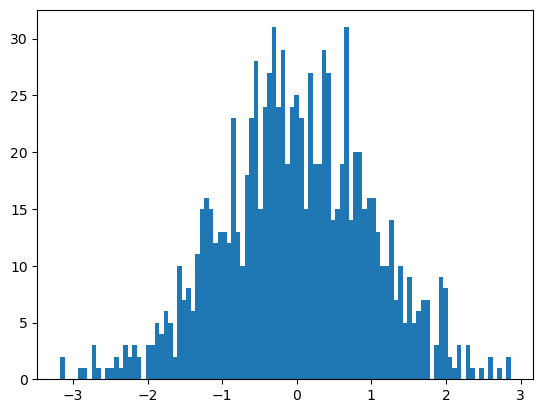

In [87]:
np.random.seed(1000)

samples = np.random.randn(1000)
plt.hist(samples, bins=100)
plt.show()

`np.random.randn(n)`은 `np.random.normal(size=n)`과 동일하게 작동한다.

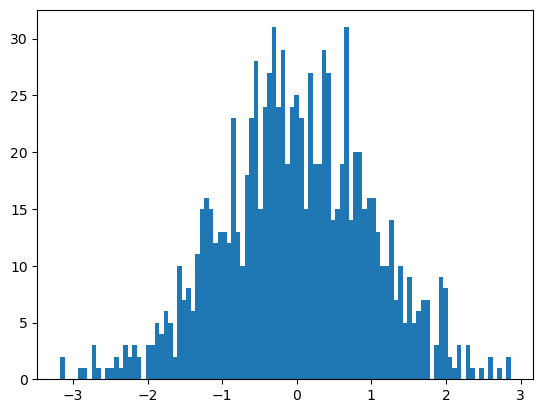

In [88]:
np.random.seed(1000)

samples = np.random.normal(size=1000)
plt.hist(samples, bins=100)
plt.show()

**`np.random.rand()`/`np.random.uniform()` 함수**

0과 1사의 임의의 부동소수점을 균등 분포를 따르면서 지정된 수만큼 생성한다.

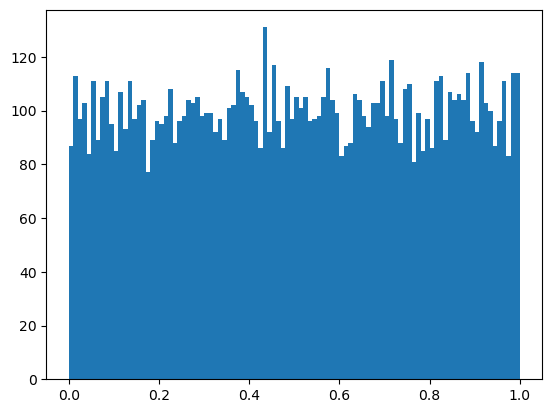

In [81]:
np.random.seed(1000)

samples = np.random.rand(10000)
plt.hist(samples, bins=100)
plt.show()

`np.random.rand(n)`은 `np.random.uniform(0, 1, n)`과 동일하게 작동한다.

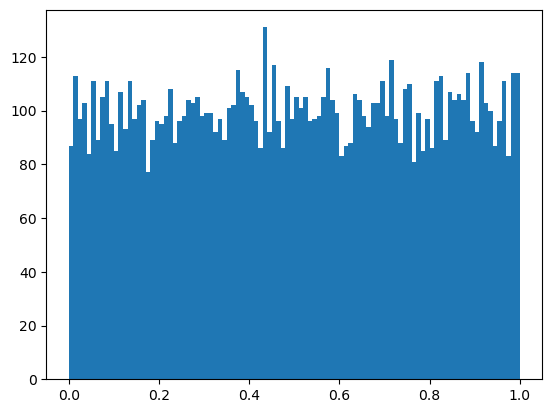

In [82]:
np.random.seed(1000)

samples = np.random.uniform(0, 1, 10000)
plt.hist(samples, bins=100)
plt.show()

**`np.random.randint()` 함수**

지정된 구간 사이에서 임의의 정수를 균등 분포를 따르면서 지정된 수만큼 생성한다.

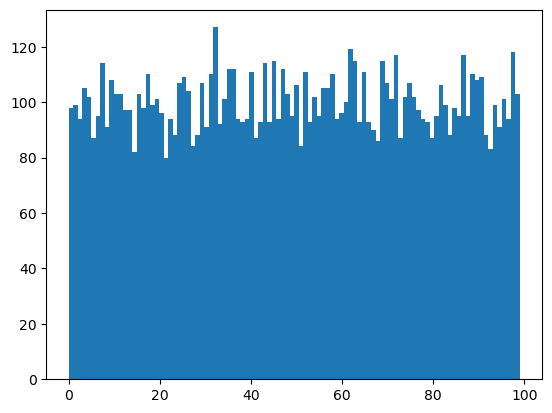

In [83]:
samples = np.random.randint(0,100,10000)
plt.hist(samples, bins=100)
plt.show()

**시드(seed)**

위에서 살펴본 무작위 함수들은 모두 실행할 때마다 조금씩 다른 무작위수를 생성한다.
하지만 시드를 지정하면 무작위 수도 동일하게 결정된다.
시드는 컴퓨터가 사용하는 난수표(random number table)의 특정 지점을 지정하는 역할을 수행한다.

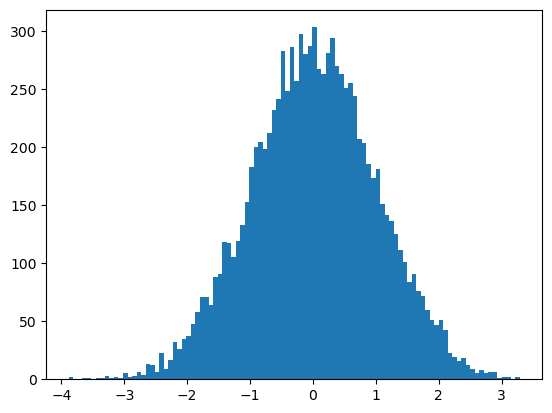

In [84]:
np.random.seed(1234)

samples = np.random.randn(10000)
plt.hist(samples, bins=100)
plt.show()

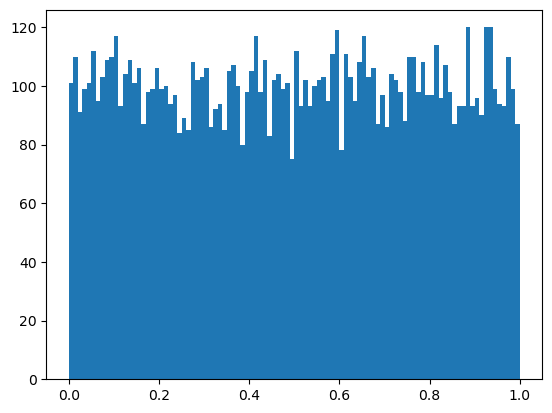

In [85]:
np.random.seed(1234)

samples = np.random.rand(10000)
plt.hist(samples, bins=100)
plt.show()

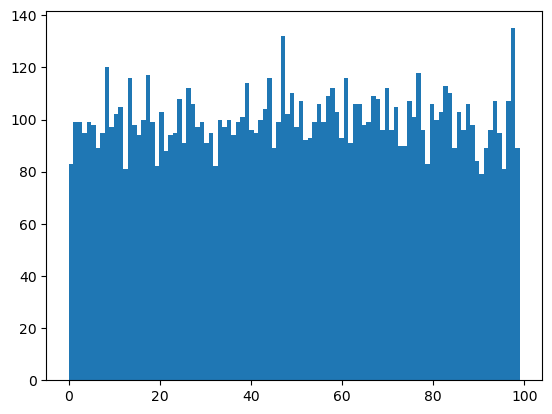

In [86]:
np.random.seed(1234)

samples = np.random.randint(0,100,10000)
plt.hist(samples, bins=100)
plt.show()

구간의 오른쪽 끝은 포함되지 않으며, 구간의 왼쪽 끝은 생략되면 0이 기본값으로 사용된다.

## 연습문제

참고: [(실습) 어레이 중심 프로그래밍](https://colab.research.google.com/github/codingalzi/datapy/blob/master/practices/practice-numpy_3.ipynb)